# Requirements

In [170]:
# Add as many imports as you need.
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [114]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('datasets/mental_health_diagnosis_treatment_data.csv')

In [115]:
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,2,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,3,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,4,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,5,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,NaN,Male,Generalized Anxiety,10,4,8,NaN,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,NaN,Improved,10,Depressed,73
496,497,22.0,Male,Panic Disorder,5,6,6,7.0,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6.0,Deteriorated,8,Happy,86
497,498,23.0,Male,Major Depressive Disorder,7,3,4,NaN,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,NaN,Deteriorated,5,Neutral,87
498,499,48.0,Male,Bipolar Disorder,9,4,6,9.0,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6.0,Improved,7,Anxious,73


In [88]:
df.columns


Index(['Patient ID', 'Age', 'Gender', 'Diagnosis', 'Symptom Severity (1-10)',
       'Mood Score (1-10)', 'Sleep Quality (1-10)',
       'Physical Activity (hrs/week)', 'Medication', 'Therapy Type',
       'Treatment Start Date', 'Treatment Duration (weeks)',
       'Stress Level (1-10)', 'Outcome', 'Treatment Progress (1-10)',
       'AI-Detected Emotional State', 'Adherence to Treatment (%)'],
      dtype='object')

Preprocess the input and the output variables appropriately.

In [116]:
# Write your code here. Add as many boxes as you need.
df.drop(columns=['Patient ID', 'Treatment Start Date'], inplace=True)

In [117]:
df

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,11,NaN,Deteriorated,7,Anxious,66
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,11,7.0,No Change,7,Neutral,78
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,14,NaN,Deteriorated,5,Happy,62
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,8,8.0,Deteriorated,10,Excited,72
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,12,5.0,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,Male,Generalized Anxiety,10,4,8,NaN,Mood Stabilizers,Dialectical Behavioral Therapy,8,NaN,Improved,10,Depressed,73
496,22.0,Male,Panic Disorder,5,6,6,7.0,Benzodiazepines,Mindfulness-Based Therapy,13,6.0,Deteriorated,8,Happy,86
497,23.0,Male,Major Depressive Disorder,7,3,4,NaN,Antidepressants,Cognitive Behavioral Therapy,10,NaN,Deteriorated,5,Neutral,87
498,48.0,Male,Bipolar Disorder,9,4,6,9.0,Antidepressants,Mindfulness-Based Therapy,10,6.0,Improved,7,Anxious,73


In [120]:
y.unique()

array(['Deteriorated', 'No Change', 'Improved'], dtype=object)

Explore the dataset using visualizations of your choice.

<Axes: ylabel='Count'>

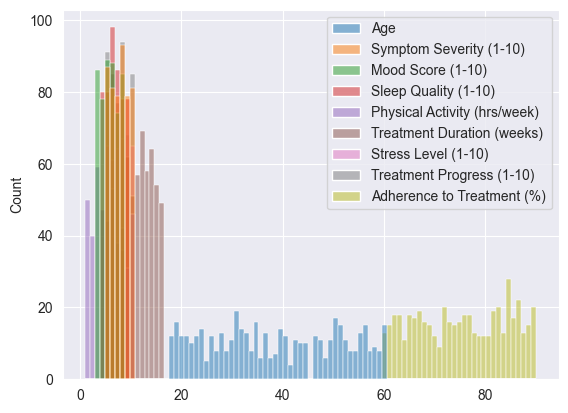

In [94]:
# Write your code here. Add as many boxes as you need.
sns.histplot(df)

Check if the dataset is balanced.

In [121]:
# Write your code here. Add as many boxes as you need.
df['Outcome'].value_counts()

Outcome
Deteriorated    171
Improved        170
No Change       159
Name: count, dtype: int64

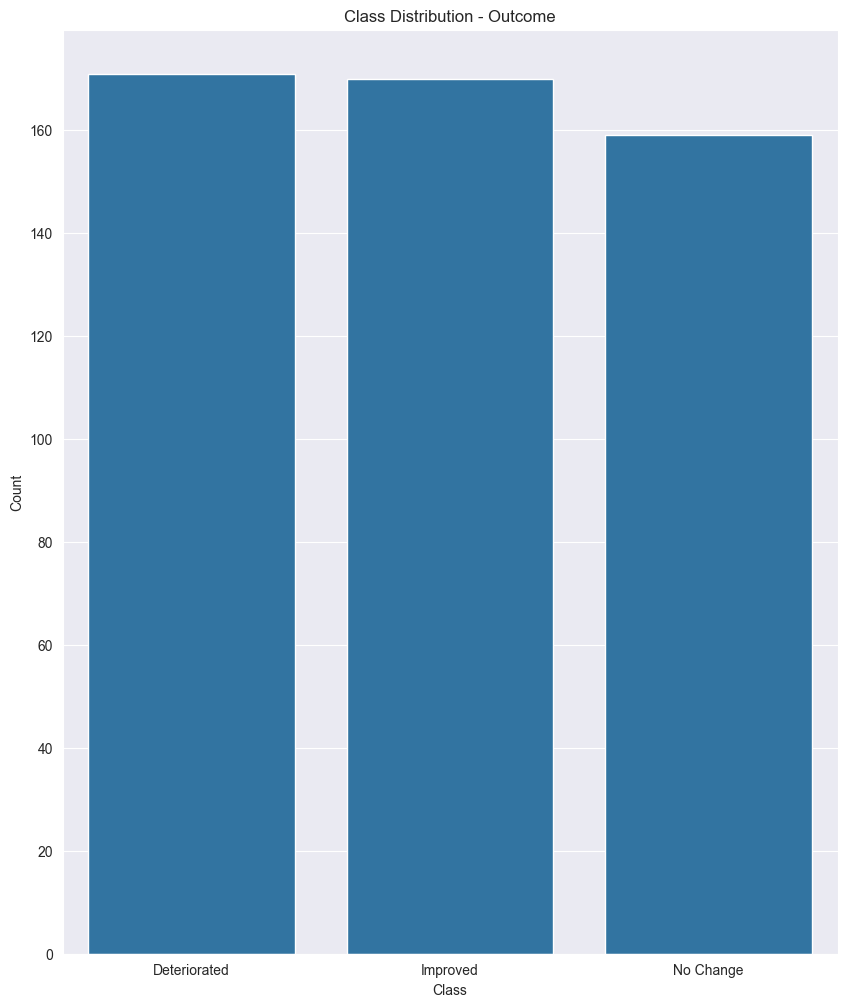

In [122]:
plt.figure(figsize=(10,12))
sns.countplot(x = df['Outcome'],order=df['Outcome'].value_counts().index)
plt.title("Class Distribution - Outcome")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Encoding 

In [97]:
df

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,11,NaN,Deteriorated,7,Anxious,66
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,11,7.0,No Change,7,Neutral,78
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,14,NaN,Deteriorated,5,Happy,62
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,8,8.0,Deteriorated,10,Excited,72
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,12,5.0,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,Male,Generalized Anxiety,10,4,8,NaN,Mood Stabilizers,Dialectical Behavioral Therapy,8,NaN,Improved,10,Depressed,73
496,22.0,Male,Panic Disorder,5,6,6,7.0,Benzodiazepines,Mindfulness-Based Therapy,13,6.0,Deteriorated,8,Happy,86
497,23.0,Male,Major Depressive Disorder,7,3,4,NaN,Antidepressants,Cognitive Behavioral Therapy,10,NaN,Deteriorated,5,Neutral,87
498,48.0,Male,Bipolar Disorder,9,4,6,9.0,Antidepressants,Mindfulness-Based Therapy,10,6.0,Improved,7,Anxious,73


In [123]:
df['Diagnosis'].value_counts()

Diagnosis
Generalized Anxiety          135
Major Depressive Disorder    125
Bipolar Disorder             124
Panic Disorder               116
Name: count, dtype: int64

# 1 NACIN 

In [142]:
encoder = LabelEncoder()

df['Outcome'] = encoder.fit_transform(df['Outcome'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Diagnosis'] = encoder.fit_transform(df['Diagnosis'])
df['Medication'] = encoder.fit_transform(df['Medication'])
df['Therapy Type'] = encoder.fit_transform(df['Therapy Type'])
df['AI-Detected Emotional State'] = encoder.fit_transform(df['AI-Detected Emotional State'])

# 2 NACIN

In [143]:
cols = ['Gender', 'Diagnosis', 'Medication', 'Outcome', 'Therapy Type', 'AI-Detected Emotional State']
df[cols] = df[cols].apply(lambda col : encoder.fit_transform(col))

In [101]:
df

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,0,2,10,5,8,NaN,4,2,11,NaN,0,7,0,66
1,40.0,0,2,9,5,4,7.0,1,2,11,7.0,2,7,4,78
2,55.0,0,2,6,3,4,NaN,5,3,14,NaN,0,5,3,62
3,34.0,0,2,6,3,6,5.0,5,3,8,8.0,0,10,2,72
4,52.0,1,3,7,6,6,8.0,2,2,12,5.0,0,6,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,1,1,10,4,8,NaN,4,1,8,NaN,1,10,1,73
496,22.0,1,3,5,6,6,7.0,3,3,13,6.0,0,8,3,86
497,23.0,1,2,7,3,4,NaN,0,0,10,NaN,0,5,4,87
498,48.0,1,0,9,4,6,9.0,0,3,10,6.0,1,7,0,73


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

<Axes: >

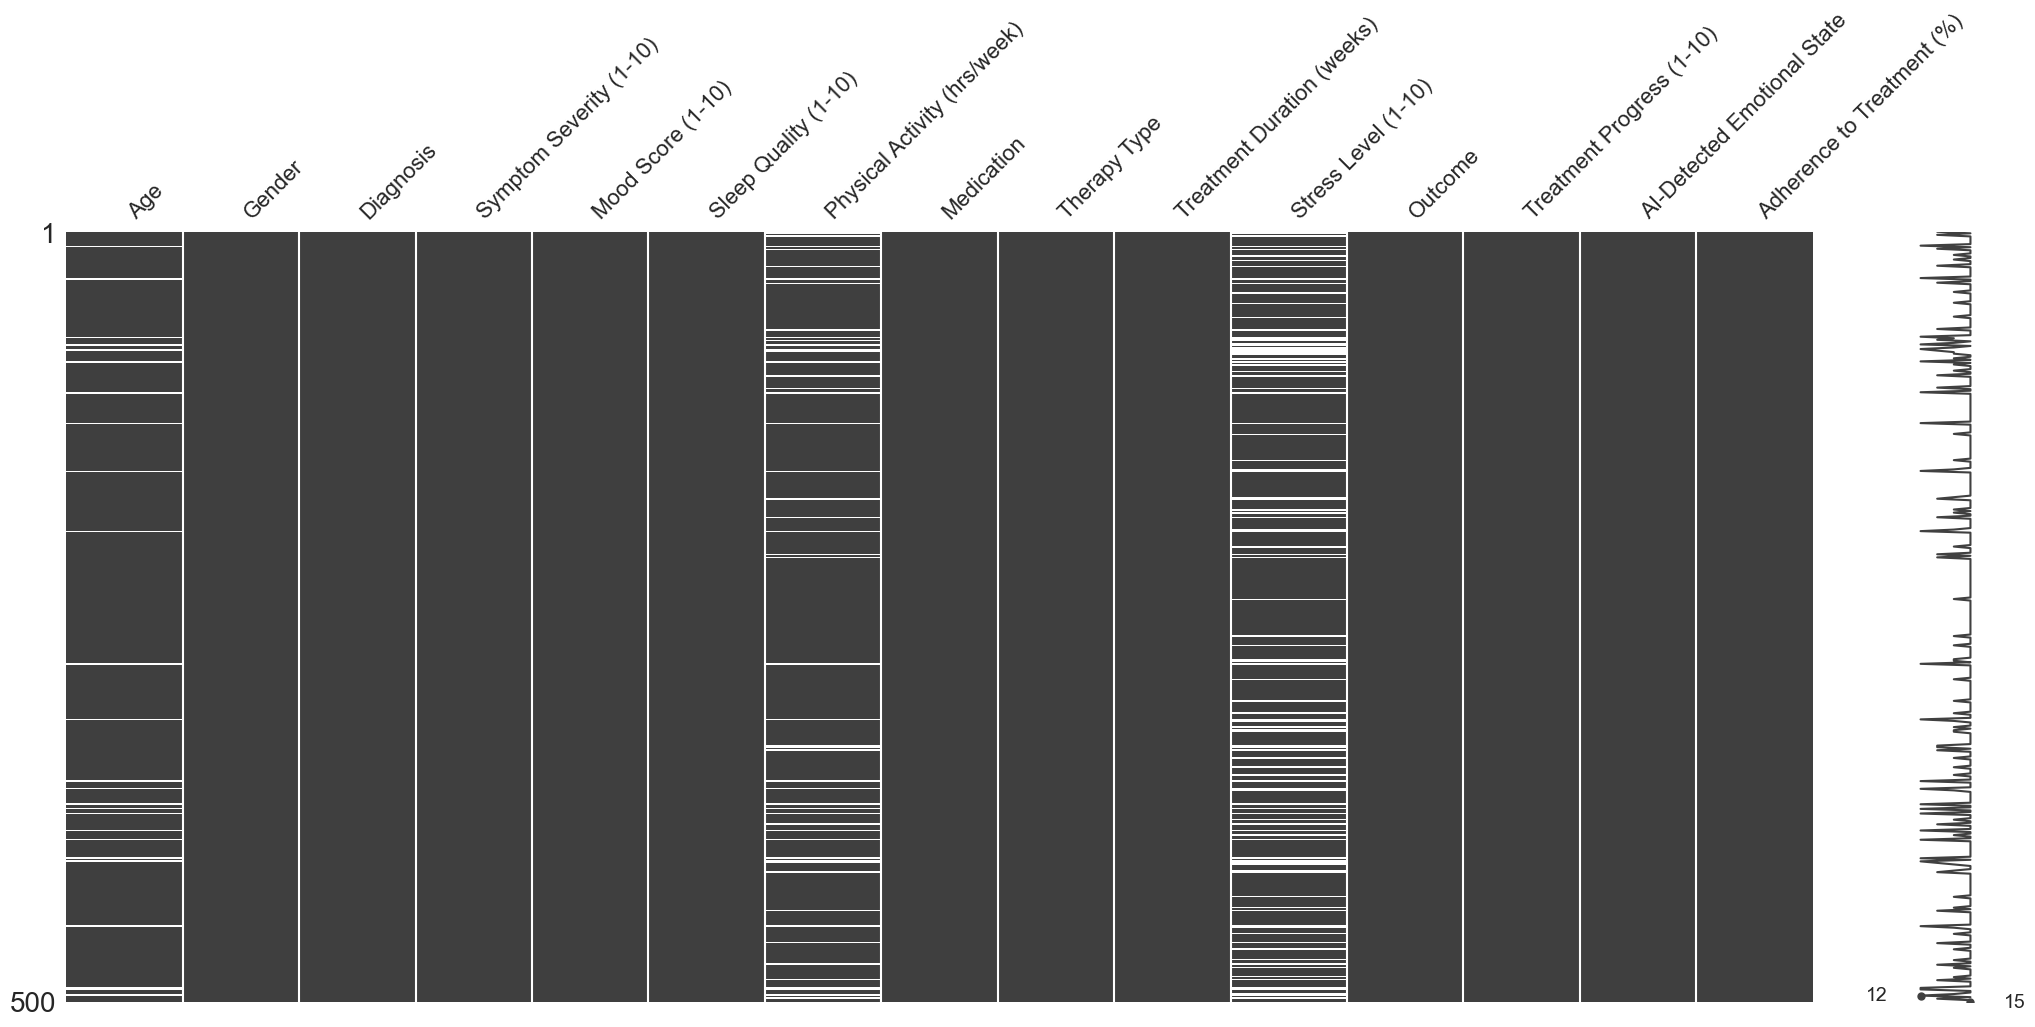

In [102]:
msno.matrix(df)

<Axes: >

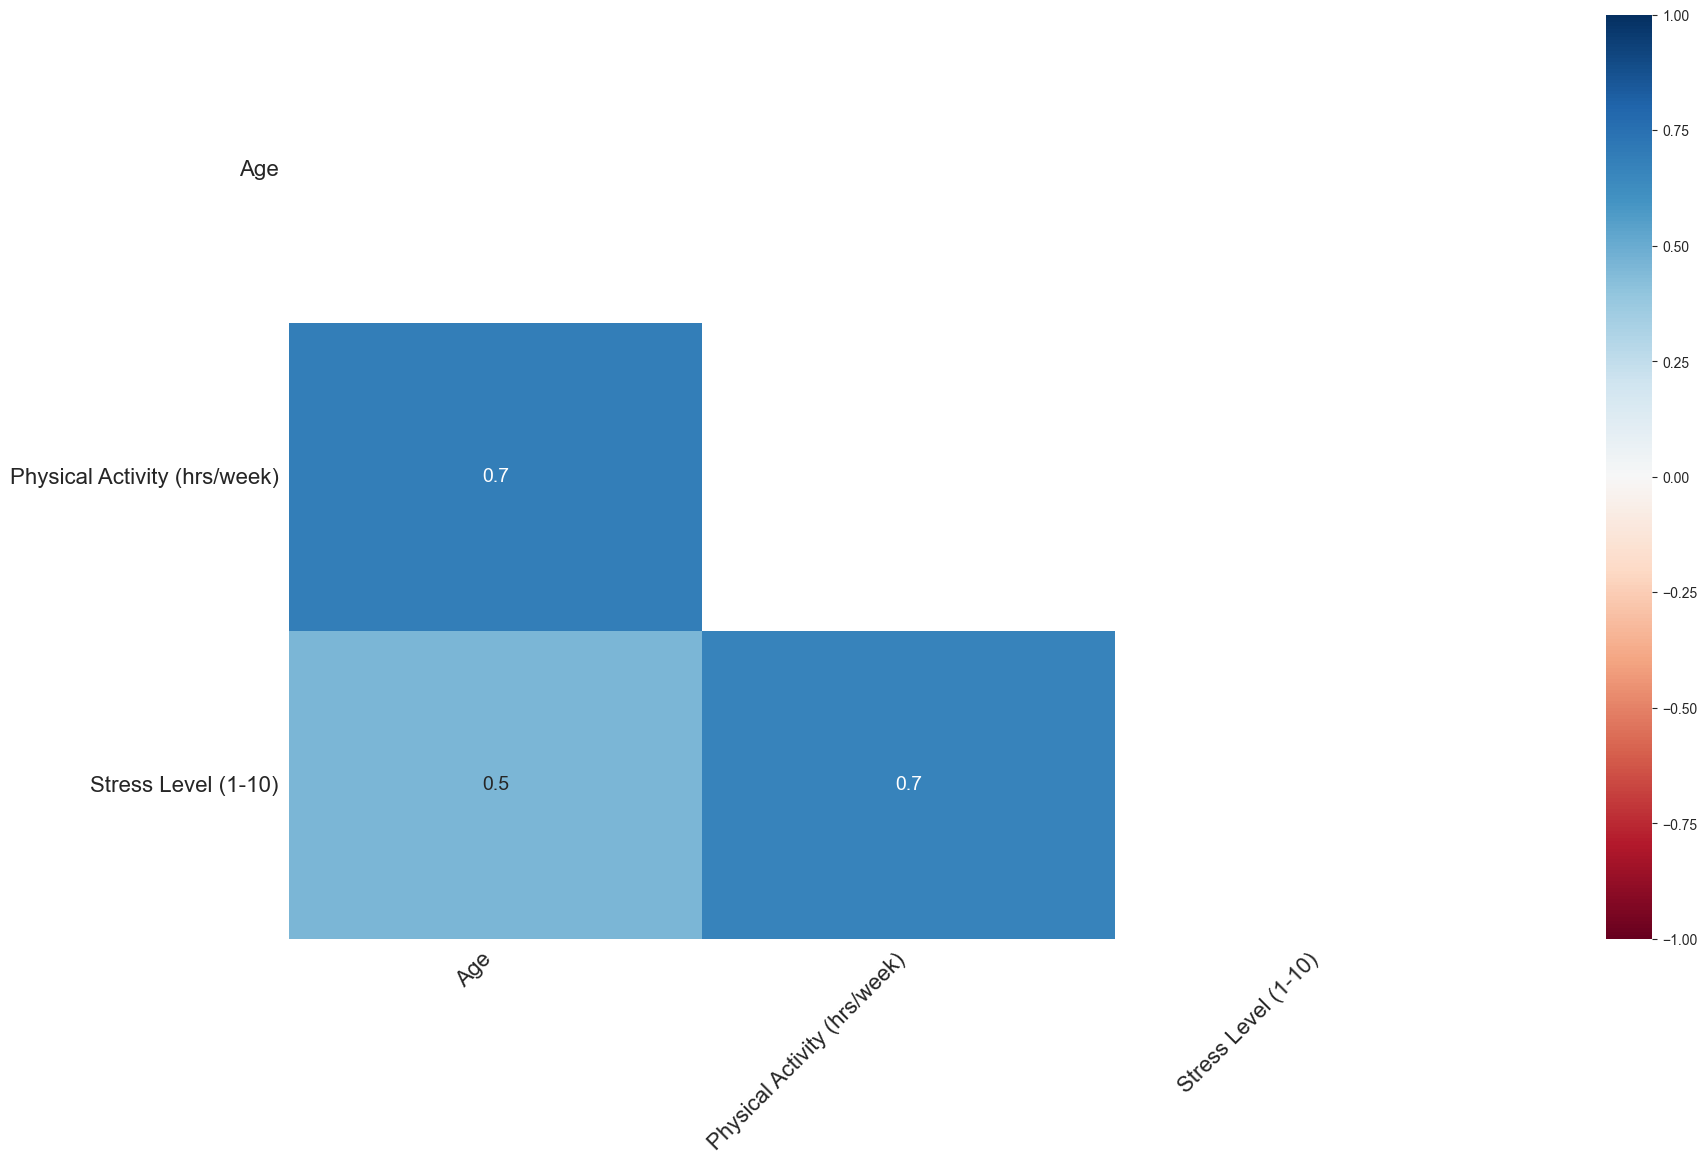

In [103]:
msno.heatmap(df)

<Axes: >

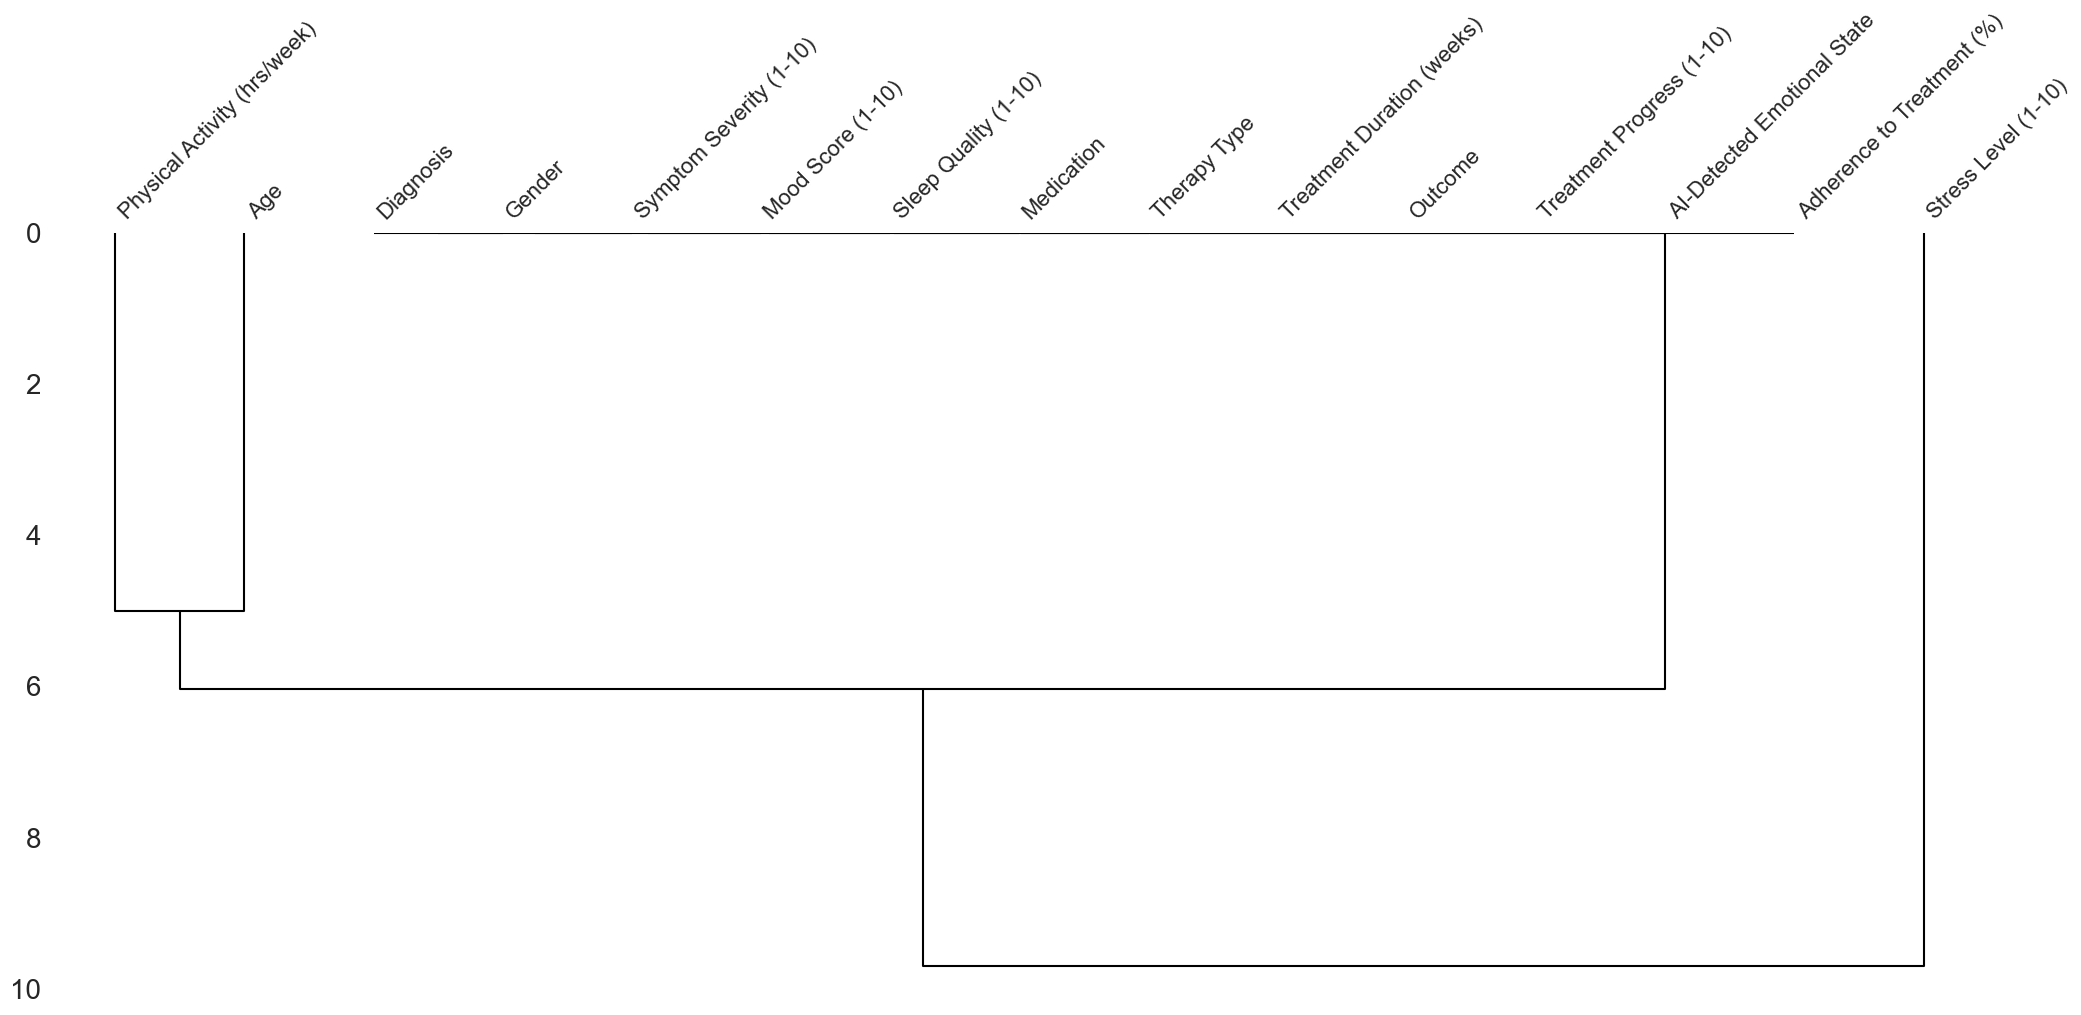

In [104]:
# Write your code here. Add as many boxes as you need.
msno.dendrogram(df)

# Dependent features

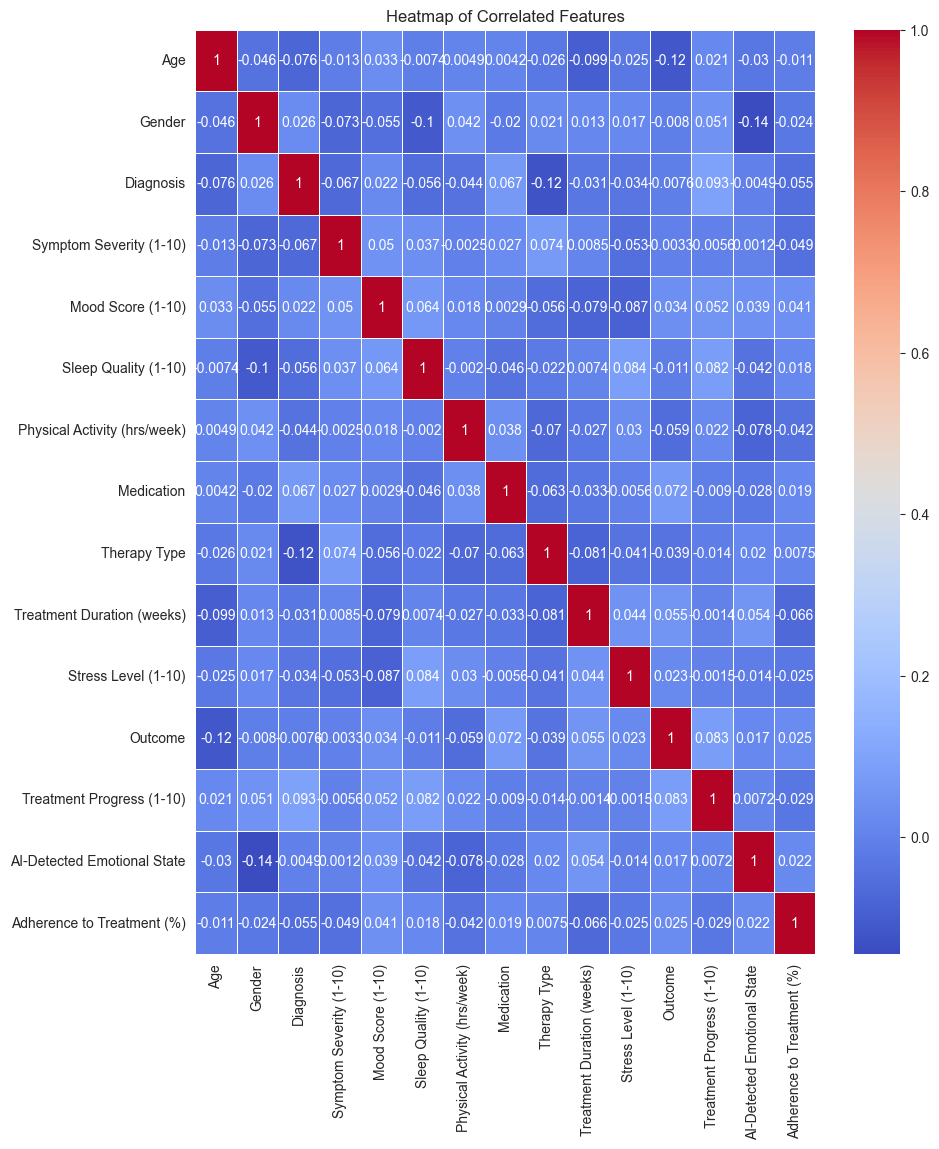

In [105]:
correlation_features = df.corr()

plt.figure(figsize=(10,12))
sns.heatmap(correlation_features,  annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlated Features")
plt.show()

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [106]:
# Write your code here. Add as many boxes as you need.
missing_values_percentage = df.isnull().sum() / len(df)
missing_values_percentage * 100

Age                              5.0
Gender                           0.0
Diagnosis                        0.0
Symptom Severity (1-10)          0.0
Mood Score (1-10)                0.0
Sleep Quality (1-10)             0.0
Physical Activity (hrs/week)    10.0
Medication                       0.0
Therapy Type                     0.0
Treatment Duration (weeks)       0.0
Stress Level (1-10)             20.0
Outcome                          0.0
Treatment Progress (1-10)        0.0
AI-Detected Emotional State      0.0
Adherence to Treatment (%)       0.0
dtype: float64

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [146]:
# Write your code here. Add as many boxes as you need.
imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer(n_neighbors=5)

df = df.dropna(subset='Age')

df['Physical Activity (hrs/week)'] = imputer.fit_transform(df[['Physical Activity (hrs/week)']])
df['Stress Level (1-10)'] = knn_imputer.fit_transform(df[['Stress Level (1-10)']])

In [108]:
df.isnull().sum()

Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio

In [156]:
x = df.drop(columns='Outcome') # MORA DA GI ZEME PRVO KAKO I X I Y BIDEJKI SE ENKODIRANI, DA BEA NA POCETOK NEMASE DA RABOTI ZOSO GENDER I OSTANATITE NE SE ENKODIRANI
y = df['Outcome']

In [153]:
# Write your code here. Add as many boxes as you need.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately

In [148]:
df.isnull().sum()

Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

In [135]:
df

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,0,2,10,5,8,5.275556,4,2,11,7.5675,0,7,0,66
1,40.0,0,2,9,5,4,7.000000,1,2,11,7.0000,2,7,4,78
2,55.0,0,2,6,3,4,5.275556,5,3,14,7.5675,0,5,3,62
3,34.0,0,2,6,3,6,5.000000,5,3,8,8.0000,0,10,2,72
4,52.0,1,3,7,6,6,8.000000,2,2,12,5.0000,0,6,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,19.0,1,2,8,5,5,2.000000,5,1,14,7.5675,1,10,5,70
496,22.0,1,3,5,6,6,7.000000,3,3,13,6.0000,0,8,3,86
497,23.0,1,2,7,3,4,5.275556,0,0,10,7.5675,0,5,4,87
498,48.0,1,0,9,4,6,9.000000,0,3,10,6.0000,1,7,0,73


In [154]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [155]:
x

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,0,2,10,5,8,5.275556,4,2,11,7.5675,7,0,66
1,40.0,0,2,9,5,4,7.000000,1,2,11,7.0000,7,4,78
2,55.0,0,2,6,3,4,5.275556,5,3,14,7.5675,5,3,62
3,34.0,0,2,6,3,6,5.000000,5,3,8,8.0000,10,2,72
4,52.0,1,3,7,6,6,8.000000,2,2,12,5.0000,6,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,19.0,1,2,8,5,5,2.000000,5,1,14,7.5675,10,5,70
496,22.0,1,3,5,6,6,7.000000,3,3,13,6.0000,8,3,86
497,23.0,1,2,7,3,4,5.275556,0,0,10,7.5675,5,4,87
498,48.0,1,0,9,4,6,9.000000,0,3,10,6.0000,7,0,73


## Model Selection

Choose and train an approriate model for the given task

In [173]:
# Write your code here. Add as many boxes as you need.
model = RandomForestClassifier()

model.fit(x_train_scaled, y_train)

RandomForestClassifier()

Use the trained model to make predictions for the test set.

In [174]:
# Write your code here. Add as many boxes as you need.
y_predict = model.predict(x_test_scaled)

Assess the performance of the model by using different classification metrics.

In [175]:
# Write your code here. Add as many boxes as you need.
print(classification_report(y_test, y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.26      0.28      0.27        29
           1       0.26      0.29      0.27        31
           2       0.45      0.37      0.41        35

    accuracy                           0.32        95
   macro avg       0.32      0.31      0.32        95
weighted avg       0.33      0.32      0.32        95

0.3157894736842105


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [176]:
# Write your code here. Add as many boxes as you need.
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [177]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()

x_train2_scaled = scaler.fit_transform(x_train2)
x_test2_scaled = scaler.transform(x_test2)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [183]:
# Write your code here. Add as many boxes as you need.
parameters_grid = {
    'n_estimators': [100,200,300],
    'max_depth' : [10,20,30],
    'min_samples_leaf' : [1, 2, 4],
    'min_samples_split' : [2,  5]
}

grid_search = GridSearchCV(RandomForestClassifier(), parameters_grid, scoring='accuracy', cv=5)

grid_search.fit(x_train2_scaled, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [186]:
# Write your code here. Add as many boxes as you need
best_model = grid_search.best_estimator_
y_pred = model.predict(x_test2_scaled)

print(grid_search.best_score_)
print(classification_report(y_test2, y_pred))

0.332640218878249
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.88      0.93      0.90        15
           2       1.00      0.82      0.90        17

    accuracy                           0.90        48
   macro avg       0.90      0.90      0.90        48
weighted avg       0.91      0.90      0.90        48

